In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['phishing-website-dataset']


In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
data = pd.read_csv('../input/phishing-website-dataset/dataset.csv')

print(data.head(20))
print(data.tail(20))

    index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0       1                          -1              1                   1   
1       2                           1              1                   1   
2       3                           1              0                   1   
3       4                           1              0                   1   
4       5                           1              0                  -1   
5       6                          -1              0                  -1   
6       7                           1              0                  -1   
7       8                           1              0                   1   
8       9                           1              0                  -1   
9      10                           1              1                  -1   
10     11                           1              1                   1   
11     12                           1              1                  -1   
12     13   

In [3]:
print(data.shape)

(11055, 32)


In [4]:
print(data.info())               

# All comumns are int type, so no change is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
#Describe statistical information of data
print(data.describe())
#Below stats show that 75 percentile of observations belong to class 1

              index  having_IPhaving_IP_Address  URLURL_Length  \
count  11055.000000                11055.000000   11055.000000   
mean    5528.000000                    0.313795      -0.633198   
std     3191.447947                    0.949534       0.766095   
min        1.000000                   -1.000000      -1.000000   
25%     2764.500000                   -1.000000      -1.000000   
50%     5528.000000                    1.000000      -1.000000   
75%     8291.500000                    1.000000      -1.000000   
max    11055.000000                    1.000000       1.000000   

       Shortining_Service  having_At_Symbol  double_slash_redirecting  \
count        11055.000000      11055.000000              11055.000000   
mean             0.738761          0.700588                  0.741474   
std              0.673998          0.713598                  0.671011   
min             -1.000000         -1.000000                 -1.000000   
25%              1.000000          1.000

(array([4898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6157.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

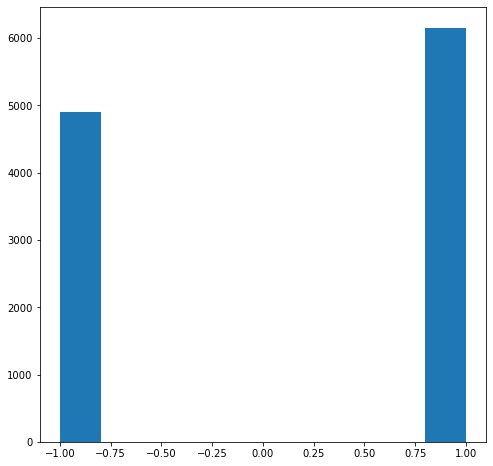

In [6]:
# Plot distribution of classes using Histograms
plt.figure(figsize =(8,8))
plt.hist(data.Result)           

# It shows that benign class have about 1000+ observations than malware

In [7]:
# Look for missing values
print(data.isnull().sum())        

# No missing values found, so no need to drop or replace any value

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

                                index  having_IPhaving_IP_Address  \
index                        1.000000                   -0.388317   
having_IPhaving_IP_Address  -0.388317                    1.000000   
URLURL_Length                0.006105                   -0.052411   
Shortining_Service          -0.006281                    0.403461   
having_At_Symbol            -0.169478                    0.158699   
double_slash_redirecting    -0.003363                    0.397389   
Prefix_Suffix               -0.007340                   -0.005257   
having_Sub_Domain            0.234091                   -0.080745   
SSLfinal_State              -0.006682                    0.071414   
Domain_registeration_length -0.001180                   -0.022739   
Favicon                      0.007293                    0.087025   
port                         0.001656                    0.060979   
HTTPS_token                  0.002916                    0.363534   
Request_URL                 -0.000

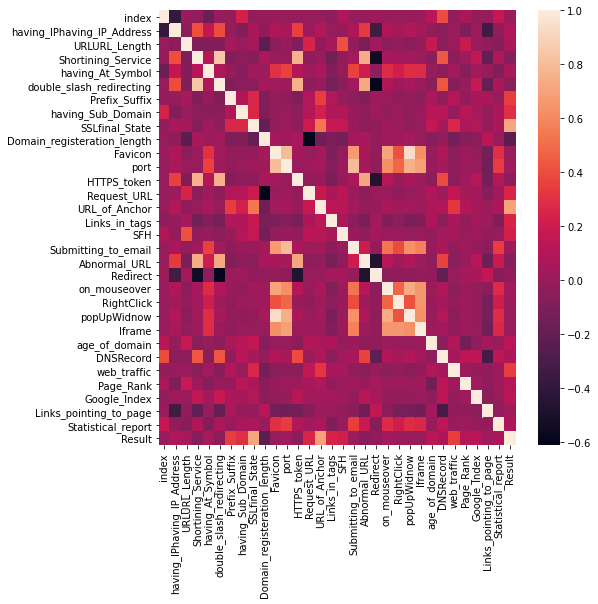

In [8]:
# Generate correlation matrix
print(data.corr())

import seaborn as sns
plt.figure(figsize =(8,8))
sns.heatmap(data.corr())    
# Generate heatmap (though very less clarity due to large no. of ftrs

In [9]:
print(data.corr()['Result'].sort_values())      # Print correlation with target variable

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [10]:
# Remove features having correlation coeff. between +/- 0.03
data.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(data.columns))

26


In [11]:
# Prepare data for models
y = data['Result'].values
X = data.drop(['Result'], axis = 1)

from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Split the data as training and testing data - 70% train size, 30% test size
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = None)

Accuracy with RF classifier: 0.964727163099186
Conf matrix RF classifier: [[1393   77]
 [  40 1807]]
Accuracy with Log Reg: 0.9237262586674706
Conf matrix Log Reg: [[1324  146]
 [ 107 1740]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy with SVM-Linear: 0.9192041000904432
Conf matrix SVM-linear: [[1294  176]
 [  92 1755]]


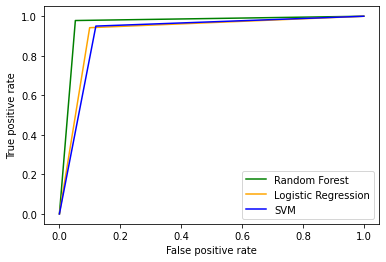

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Accuracy by RFClassifier after RFE is applied: 0.9650286403376545


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Accuracy by SVM-Linear after RFE is applied: 0.9192041000904432
Accuracy by Logistic Regression after RFE is applied: 0.9237262586674706


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=27 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
#1 Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
print("Accuracy with RF classifier:",accuracy_score(y_test, prediction)) 
fpr,tpr,thresh = roc_curve(y_test,prediction)      
roc_auc = accuracy_score(y_test,prediction)         # Calculate ROC AUC

# Plot ROC curve for Random Forest
plt.plot(fpr,tpr,'g',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.legend(loc='lower right')
print("Conf matrix RF classifier:",confusion_matrix(y_test,prediction))  #  Generate confusion matrix

#2 Classification using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Accuracy with Log Reg:", accuracy_score(y_test, prediction))
print ("Conf matrix Log Reg:",confusion_matrix(y_test,prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

#3 Classification using SVM
from sklearn.svm import SVC
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(X_train,y_train)
prediction = svc_l.predict(X_test)
print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for SVM-linear
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))

plt.show()


'''
# -------- Apply Recursive Feature Elimination(RFE) and use reduced feature set for prediction ------------------------
# Recursive Feature Elimination(RFE) is a technique that takes entire feature set as input and removes features one at 
# a time up to a specified number or until a stopping criteria is met.
'''

from sklearn.feature_selection import RFE
rfe = RFE(rfc,27)                              
rfe = rfe.fit(X_train, y_train)               # Train RF classifier with only 27 features now
pred = rfe.predict(X_test)

# Test accuracy on reduced data
print("Accuracy by RFClassifier after RFE is applied:", accuracy_score(y_test,pred))

rfe = RFE(svc_l,27)
rfe = rfe.fit(X_train, y_train)               # Train SVM with only 27 features now
pred = rfe.predict(X_test)
print("Accuracy by SVM-Linear after RFE is applied:", accuracy_score(y_test,pred))

rfe = RFE(logreg,27)
rfe = rfe.fit(X_train, y_train)              # Train Logistic-Reg with only 27 features now
pred = rfe.predict(X_test)
print("Accuracy by Logistic Regression after RFE is applied:", accuracy_score(y_test,pred))